<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml15_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN(Artificial Neural Network, 인공 신경망)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split

# tensorflow, keras
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__  # Google Colab에 설치된 Tensorflow 버전

'2.8.2'

In [3]:
keras.__version__  # Google Colab의 Keras 버전

'2.8.0'

# Iris 데이터 셋

In [4]:
data, target = datasets.load_iris(return_X_y=True)

In [5]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
target[:5]

array([0, 0, 0, 0, 0])

## petal_length, petal_width 변수만 선택한 이진 분류

In [7]:
X = data[:, 2:].copy()
y = (target != 0).astype('int')

In [8]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## SGD Classifier

In [10]:
sgd = SGDClassifier(loss='log', max_iter=10,
                    n_jobs=-1, random_state=42)

In [11]:
sgd.fit(X, y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [12]:
sgd.coef_

array([[9.29310825, 9.5046378 ]])

In [13]:
sgd.intercept_

array([-33.65502003])

In [14]:
pred_prob = sgd.predict_proba(X)
pred_prob[:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [15]:
pred = sgd.predict(X)
pred[:5]

array([0, 0, 0, 0, 0])

In [16]:
np.mean(y == pred)

1.0

## Neural Network

In [17]:
# 신경망 모델 생성
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(2,))],
                         name='iris_binary_single_layer')

In [18]:
# 신경망 모델 요약 정보: layers, parameters
model.summary()

Model: "iris_binary_single_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 신경망 모델 컴파일: optimizer(훈련 방식), loss(손실 함수), metrics(평가 점수 함수) 설정
model.compile(optimizer='sgd', 
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [20]:
# 신경망 훈련
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
150/150 [==============================] - 3s 2ms/step - loss: 0.5041 - binary_accuracy: 0.6667
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3303 - binary_accuracy: 0.6733
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2935 - binary_accuracy: 0.8467
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2739 - binary_accuracy: 0.9267
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2565 - binary_accuracy: 0.9533
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2409 - binary_accuracy: 0.9800
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2268 - binary_accuracy: 0.9867
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2142 - binary_accuracy: 0.9933
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2027 - binary_accuracy: 0.9933
Epoch 10/10
150/150 [================

In [21]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.48115423],
        [1.4339734 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.7035384], dtype=float32)>]

In [22]:
pred = model.predict(X)  # 이진 분류에서 predict()는 양성(1)이 될 확률
pred.shape

(150, 1)

In [23]:
pred[:5]

array([[0.32232055],
       [0.32232055],
       [0.31190178],
       [0.33291897],
       [0.32232055]], dtype=float32)

In [24]:
# 예측값(0 또는 1)을 계산하기 위해서는 확률 > 0.5 비교해야 함.
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
np.mean(y == pred_label)  # 정확도: 실젯값과 예측값 비교

1.0

## 모든 변수(sl, sw, pl, pw)를 사용한 이진 분류

In [26]:
X = data.copy()

### SGD

In [27]:
sgd = SGDClassifier(loss='log', max_iter=10,
                    n_jobs=-1, random_state=42)

In [28]:
sgd.fit(X, y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [35]:
sgd.coef_, sgd.intercept_

(array([[ -7.56466569, -26.11029771,  43.43582235,  20.74182528]]),
 array([-14.82209562]))

In [29]:
pred = sgd.predict(X)  # 예측값(0 또는 1)

In [30]:
np.mean(y == pred)

1.0

### 신경망

In [31]:
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(4,))])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [34]:
model.fit(X, y, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.8471 - binary_accuracy: 0.6467
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3228 - binary_accuracy: 0.8800
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1834 - binary_accuracy: 1.0000
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1250 - binary_accuracy: 1.0000
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0972 - binary_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0782 - binary_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0663 - binary_accuracy: 1.0000
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0573 - binary_accuracy: 1.0000
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0510 - binary_accuracy: 1.0000
Epoch 10/10
150/150 [================

In [36]:
# 신경망이 학습 데이터를 훈련하면 가중치들을 찾음.
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.18837994],
        [-1.1131188 ],
        [ 1.5116737 ],
        [ 0.99822456]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.37639856], dtype=float32)>]

In [37]:
pred = model.predict(X)
pred[:5]

array([[0.05131645],
       [0.08924986],
       [0.06543989],
       [0.0973995 ],
       [0.04699684]], dtype=float32)

In [40]:
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label[:5]

array([0, 0, 0, 0, 0])

In [42]:
np.mean(y == pred_label)  # 훈련 셋 정확도

1.0

## Iris 다중 클래스 분류

In [43]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [44]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### SGD classifier

In [45]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [46]:
sgd.fit(X=data, y=target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [47]:
sgd.coef_  # (n_classes, n_features)

array([[   7.32064421,   13.17715959,  -27.57442655,  -12.68911664],
       [  51.85595122, -145.56864647,   40.12103144, -111.8071359 ],
       [-122.62126983, -110.20331528,  189.91857208,  159.89458444]])

In [48]:
sgd.intercept_

array([   4.97012943,   87.73116955, -122.93221386])

In [49]:
# 훈련 셋 예측 확률
pred_prob = sgd.predict_proba(X=data)
pred_prob[:5]

array([[1.00000000e+00, 2.34871875e-54, 0.00000000e+00],
       [1.00000000e+00, 2.99578244e-27, 0.00000000e+00],
       [1.00000000e+00, 3.85472447e-46, 0.00000000e+00],
       [1.00000000e+00, 1.38277811e-38, 0.00000000e+00],
       [1.00000000e+00, 6.26310478e-63, 0.00000000e+00]])

In [50]:
pred_prob[-5:]

array([[4.79904210e-35, 1.80385537e-22, 1.00000000e+00],
       [7.02140712e-35, 5.00000000e-01, 5.00000000e-01],
       [4.99499990e-34, 2.08553589e-12, 1.00000000e+00],
       [9.67207569e-37, 1.55894047e-55, 1.00000000e+00],
       [1.23211445e-33, 5.96727101e-18, 1.00000000e+00]])

In [53]:
np.argmax(pred_prob, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [51]:
pred_label = sgd.predict(X=data)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
np.mean(target == pred_label)

0.9333333333333333

### NN

In [65]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=3,
                             activation=keras.activations.softmax,
                             input_shape=(4,)))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
# optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='...'

In [68]:
model.fit(x=data, y=target, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.8465 - sparse_categorical_accuracy: 0.6667
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5546 - sparse_categorical_accuracy: 0.7867
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4781 - sparse_categorical_accuracy: 0.7933
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4412 - sparse_categorical_accuracy: 0.7867
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4153 - sparse_categorical_accuracy: 0.8400
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8067
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3863 - sparse_categorical_accuracy: 0.8400
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3659 - sparse_categorical_accuracy: 0.8333
Epoch 9/10
150/150 [============================

In [69]:
# 신경망 모델이 훈련을 통해서 찾은 가중치: (n_inputs, n_units) & (n_units,)
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.43337086,  0.36322987, -0.77960867],
        [ 0.69662786, -0.72153366, -0.78999084],
        [-1.1369903 ,  0.31952307,  1.4951575 ],
        [-1.2023998 , -0.74803066,  0.9259775 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.2039111 ,  0.17619413, -0.380105  ], dtype=float32)>]

In [70]:
# 다중 클래스 분류 신경망 모델의 predict(): 각 클래스가 될 확률들
pred = model.predict(x=data)

In [71]:
pred[:5]

array([[9.6118772e-01, 3.8442396e-02, 3.6989909e-04],
       [9.2297441e-01, 7.6073624e-02, 9.5200160e-04],
       [9.4772053e-01, 5.1568165e-02, 7.1129220e-04],
       [9.2067242e-01, 7.7795371e-02, 1.5322866e-03],
       [9.6588004e-01, 3.3758383e-02, 3.6167150e-04]], dtype=float32)

In [72]:
pred[-5:]

array([[0.00366599, 0.17518978, 0.8211443 ],
       [0.0039038 , 0.24293919, 0.75315696],
       [0.0051534 , 0.21792412, 0.7769225 ],
       [0.00236819, 0.08894419, 0.90868765],
       [0.00519335, 0.18080674, 0.81399995]], dtype=float32)

In [73]:
pred.shape  #> 신경망에서 최종 output의 shape

(150, 3)

In [74]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
np.mean(target == pred_label)

0.9

# Fashion MNIST datasets

In [76]:
(X_tr, y_tr), (X_te, y_te) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [77]:
X_tr.shape, y_tr.shape

((60000, 28, 28), (60000,))

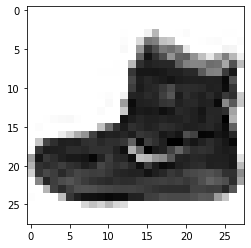

In [78]:
img = X_tr[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [79]:
y_tr[0]

9

In [81]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [82]:
X_te.shape, y_te.shape

((10000, 28, 28), (10000,))

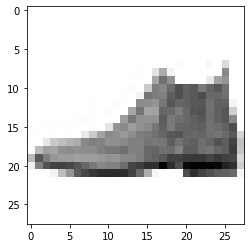

In [83]:
img = X_te[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [85]:
y_te[0]

9

In [86]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))